# Results analisys

This Notebook has the intention to compares the metrics of a DRL Policy and a RB Policy applied both to a Building Control in EnergyPlus model.

## Importing the evaluation result files

First you need to import the files produced by `init_conventional.py` `init_evaluation.py`. The first is the RB Policy applied to the evaluation case, while the second one is the DRL Policy applied to the same scenario.

In [70]:
# Import the necesaty libraries
import pandas as pd

# Replace 'ppo_file_path' and 'rb_file_path' with the actual paths to your CSV files
drl_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/VN_P1_DQN/VN_P1_DQN.csv"
rb_file_path = "C:/Users/grhen/Documents/Resultados_RLforEP/VN_P1_RB_2/VN_P1_RB_2.csv"

# Read CSV files into pandas DataFrames
drl_data = pd.read_csv(drl_file_path, header=None)
rb_data = pd.read_csv(rb_file_path, header=None)

# Function to clean and format the data
def clean_and_format(data: pd.DataFrame):
    # Remove empty rows
    data = data.dropna(how='all')

    # Add the specified header
    header = ["To", "Ti", "v", "d", "RHo", "RHi", "dh", "dc", "window_shading_control_1","window_shading_control_2","opening_window_1",
              "opening_window_2", 'hora', 'simulation_day', "rad",
              
              "Dry Bulb Temperature day 1 hour 0","Relative Humidity day 1 hour 0","Wind Direction day 1 hour 0","Wind Speed day 1 hour 0","Total Sky day 1 hour 0","Liquid Precipitation Depth day 1 hour 0",
              "Dry Bulb Temperature day 1 hour 1","Relative Humidity day 1 hour 1","Wind Direction day 1 hour 1","Wind Speed day 1 hour 1","Total Sky day 1 hour 1","Liquid Precipitation Depth day 1 hour 1",
              "Dry Bulb Temperature day 1 hour 2","Relative Humidity day 1 hour 2","Wind Direction day 1 hour 2","Wind Speed day 1 hour 2","Total Sky day 1 hour 2","Liquid Precipitation Depth day 1 hour 2",
              "Dry Bulb Temperature day 1 hour 3","Relative Humidity day 1 hour 3","Wind Direction day 1 hour 3","Wind Speed day 1 hour 3","Total Sky day 1 hour 3","Liquid Precipitation Depth day 1 hour 3",
              "Dry Bulb Temperature day 1 hour 4","Relative Humidity day 1 hour 4","Wind Direction day 1 hour 4","Wind Speed day 1 hour 4","Total Sky day 1 hour 4","Liquid Precipitation Depth day 1 hour 4",
              "Dry Bulb Temperature day 1 hour 5","Relative Humidity day 1 hour 5","Wind Direction day 1 hour 5","Wind Speed day 1 hour 5","Total Sky day 1 hour 5","Liquid Precipitation Depth day 1 hour 5",
              "Dry Bulb Temperature day 1 hour 6","Relative Humidity day 1 hour 6","Wind Direction day 1 hour 6","Wind Speed day 1 hour 6","Total Sky day 1 hour 6","Liquid Precipitation Depth day 1 hour 6",
              "Dry Bulb Temperature day 1 hour 7","Relative Humidity day 1 hour 7","Wind Direction day 1 hour 7","Wind Speed day 1 hour 7","Total Sky day 1 hour 7","Liquid Precipitation Depth day 1 hour 7",
              "Dry Bulb Temperature day 1 hour 8","Relative Humidity day 1 hour 8","Wind Direction day 1 hour 8","Wind Speed day 1 hour 8","Total Sky day 1 hour 8","Liquid Precipitation Depth day 1 hour 8",
              "Dry Bulb Temperature day 1 hour 9","Relative Humidity day 1 hour 9","Wind Direction day 1 hour 9","Wind Speed day 1 hour 9","Total Sky day 1 hour 9","Liquid Precipitation Depth day 1 hour 9",
              "Dry Bulb Temperature day 1 hour 10","Relative Humidity day 1 hour 10","Wind Direction day 1 hour 10","Wind Speed day 1 hour 10","Total Sky day 1 hour 10","Liquid Precipitation Depth day 1 hour 10",
              "Dry Bulb Temperature day 1 hour 11","Relative Humidity day 1 hour 11","Wind Direction day 1 hour 11","Wind Speed day 1 hour 11","Total Sky day 1 hour 11","Liquid Precipitation Depth day 1 hour 11",
              "Dry Bulb Temperature day 1 hour 12","Relative Humidity day 1 hour 12","Wind Direction day 1 hour 12","Wind Speed day 1 hour 12","Total Sky day 1 hour 12","Liquid Precipitation Depth day 1 hour 12",
              "Dry Bulb Temperature day 1 hour 13","Relative Humidity day 1 hour 13","Wind Direction day 1 hour 13","Wind Speed day 1 hour 13","Total Sky day 1 hour 13","Liquid Precipitation Depth day 1 hour 13",
              "Dry Bulb Temperature day 1 hour 14","Relative Humidity day 1 hour 14","Wind Direction day 1 hour 14","Wind Speed day 1 hour 14","Total Sky day 1 hour 14","Liquid Precipitation Depth day 1 hour 14",
              "Dry Bulb Temperature day 1 hour 15","Relative Humidity day 1 hour 15","Wind Direction day 1 hour 15","Wind Speed day 1 hour 15","Total Sky day 1 hour 15","Liquid Precipitation Depth day 1 hour 15",
              "Dry Bulb Temperature day 1 hour 16","Relative Humidity day 1 hour 16","Wind Direction day 1 hour 16","Wind Speed day 1 hour 16","Total Sky day 1 hour 16","Liquid Precipitation Depth day 1 hour 16",
              "Dry Bulb Temperature day 1 hour 17","Relative Humidity day 1 hour 17","Wind Direction day 1 hour 17","Wind Speed day 1 hour 17","Total Sky day 1 hour 17","Liquid Precipitation Depth day 1 hour 17",
              "Dry Bulb Temperature day 1 hour 18","Relative Humidity day 1 hour 18","Wind Direction day 1 hour 18","Wind Speed day 1 hour 18","Total Sky day 1 hour 18","Liquid Precipitation Depth day 1 hour 18",
              "Dry Bulb Temperature day 1 hour 19","Relative Humidity day 1 hour 19","Wind Direction day 1 hour 19","Wind Speed day 1 hour 19","Total Sky day 1 hour 19","Liquid Precipitation Depth day 1 hour 19",
              "Dry Bulb Temperature day 1 hour 20","Relative Humidity day 1 hour 20","Wind Direction day 1 hour 20","Wind Speed day 1 hour 20","Total Sky day 1 hour 20","Liquid Precipitation Depth day 1 hour 20",
              "Dry Bulb Temperature day 1 hour 21","Relative Humidity day 1 hour 21","Wind Direction day 1 hour 21","Wind Speed day 1 hour 21","Total Sky day 1 hour 21","Liquid Precipitation Depth day 1 hour 21",
              "Dry Bulb Temperature day 1 hour 22","Relative Humidity day 1 hour 22","Wind Direction day 1 hour 22","Wind Speed day 1 hour 22","Total Sky day 1 hour 22","Liquid Precipitation Depth day 1 hour 22",
              "Dry Bulb Temperature day 1 hour 23","Relative Humidity day 1 hour 23","Wind Direction day 1 hour 23","Wind Speed day 1 hour 23","Total Sky day 1 hour 23","Liquid Precipitation Depth day 1 hour 23",
              
              "Dry Bulb Temperature day 2 hour 0","Relative Humidity day 2 hour 0","Wind Direction day 2 hour 0","Wind Speed day 2 hour 0","Total Sky day 2 hour 0","Liquid Precipitation Depth day 2 hour 0",
              "Dry Bulb Temperature day 2 hour 1","Relative Humidity day 2 hour 1","Wind Direction day 2 hour 1","Wind Speed day 2 hour 1","Total Sky day 2 hour 1","Liquid Precipitation Depth day 2 hour 1",
              "Dry Bulb Temperature day 2 hour 2","Relative Humidity day 2 hour 2","Wind Direction day 2 hour 2","Wind Speed day 2 hour 2","Total Sky day 2 hour 2","Liquid Precipitation Depth day 2 hour 2",
              "Dry Bulb Temperature day 2 hour 3","Relative Humidity day 2 hour 3","Wind Direction day 2 hour 3","Wind Speed day 2 hour 3","Total Sky day 2 hour 3","Liquid Precipitation Depth day 2 hour 3",
              "Dry Bulb Temperature day 2 hour 4","Relative Humidity day 2 hour 4","Wind Direction day 2 hour 4","Wind Speed day 2 hour 4","Total Sky day 2 hour 4","Liquid Precipitation Depth day 2 hour 4",
              "Dry Bulb Temperature day 2 hour 5","Relative Humidity day 2 hour 5","Wind Direction day 2 hour 5","Wind Speed day 2 hour 5","Total Sky day 2 hour 5","Liquid Precipitation Depth day 2 hour 5",
              "Dry Bulb Temperature day 2 hour 6","Relative Humidity day 2 hour 6","Wind Direction day 2 hour 6","Wind Speed day 2 hour 6","Total Sky day 2 hour 6","Liquid Precipitation Depth day 2 hour 6",
              "Dry Bulb Temperature day 2 hour 7","Relative Humidity day 2 hour 7","Wind Direction day 2 hour 7","Wind Speed day 2 hour 7","Total Sky day 2 hour 7","Liquid Precipitation Depth day 2 hour 7",
              "Dry Bulb Temperature day 2 hour 8","Relative Humidity day 2 hour 8","Wind Direction day 2 hour 8","Wind Speed day 2 hour 8","Total Sky day 2 hour 8","Liquid Precipitation Depth day 2 hour 8",
              "Dry Bulb Temperature day 2 hour 9","Relative Humidity day 2 hour 9","Wind Direction day 2 hour 9","Wind Speed day 2 hour 9","Total Sky day 2 hour 9","Liquid Precipitation Depth day 2 hour 9",
              "Dry Bulb Temperature day 2 hour 10","Relative Humidity day 2 hour 10","Wind Direction day 2 hour 10","Wind Speed day 2 hour 10","Total Sky day 2 hour 10","Liquid Precipitation Depth day 2 hour 10",
              "Dry Bulb Temperature day 2 hour 11","Relative Humidity day 2 hour 11","Wind Direction day 2 hour 11","Wind Speed day 2 hour 11","Total Sky day 2 hour 11","Liquid Precipitation Depth day 2 hour 11",
              "Dry Bulb Temperature day 2 hour 12","Relative Humidity day 2 hour 12","Wind Direction day 2 hour 12","Wind Speed day 2 hour 12","Total Sky day 2 hour 12","Liquid Precipitation Depth day 2 hour 12",
              "Dry Bulb Temperature day 2 hour 13","Relative Humidity day 2 hour 13","Wind Direction day 2 hour 13","Wind Speed day 2 hour 13","Total Sky day 2 hour 13","Liquid Precipitation Depth day 2 hour 13",
              "Dry Bulb Temperature day 2 hour 14","Relative Humidity day 2 hour 14","Wind Direction day 2 hour 14","Wind Speed day 2 hour 14","Total Sky day 2 hour 14","Liquid Precipitation Depth day 2 hour 14",
              "Dry Bulb Temperature day 2 hour 15","Relative Humidity day 2 hour 15","Wind Direction day 2 hour 15","Wind Speed day 2 hour 15","Total Sky day 2 hour 15","Liquid Precipitation Depth day 2 hour 15",
              "Dry Bulb Temperature day 2 hour 16","Relative Humidity day 2 hour 16","Wind Direction day 2 hour 16","Wind Speed day 2 hour 16","Total Sky day 2 hour 16","Liquid Precipitation Depth day 2 hour 16",
              "Dry Bulb Temperature day 2 hour 17","Relative Humidity day 2 hour 17","Wind Direction day 2 hour 17","Wind Speed day 2 hour 17","Total Sky day 2 hour 17","Liquid Precipitation Depth day 2 hour 17",
              "Dry Bulb Temperature day 2 hour 18","Relative Humidity day 2 hour 18","Wind Direction day 2 hour 18","Wind Speed day 2 hour 18","Total Sky day 2 hour 18","Liquid Precipitation Depth day 2 hour 18",
              "Dry Bulb Temperature day 2 hour 19","Relative Humidity day 2 hour 19","Wind Direction day 2 hour 19","Wind Speed day 2 hour 19","Total Sky day 2 hour 19","Liquid Precipitation Depth day 2 hour 19",
              "Dry Bulb Temperature day 2 hour 20","Relative Humidity day 2 hour 20","Wind Direction day 2 hour 20","Wind Speed day 2 hour 20","Total Sky day 2 hour 20","Liquid Precipitation Depth day 2 hour 20",
              "Dry Bulb Temperature day 2 hour 21","Relative Humidity day 2 hour 21","Wind Direction day 2 hour 21","Wind Speed day 2 hour 21","Total Sky day 2 hour 21","Liquid Precipitation Depth day 2 hour 21",
              "Dry Bulb Temperature day 2 hour 22","Relative Humidity day 2 hour 22","Wind Direction day 2 hour 22","Wind Speed day 2 hour 22","Total Sky day 2 hour 22","Liquid Precipitation Depth day 2 hour 22",
              "Dry Bulb Temperature day 2 hour 23","Relative Humidity day 2 hour 23","Wind Direction day 2 hour 23","Wind Speed day 2 hour 23","Total Sky day 2 hour 23","Liquid Precipitation Depth day 2 hour 23",
              
              "reward", "terminated", "truncated", 'energy']

    data.columns = header

    return data

# Apply cleaning and formatting to both DataFrames
drl_data_cleaned = clean_and_format(drl_data)
rb_data_cleaned = clean_and_format(rb_data)

# Now 'ppo_data_cleaned' and 'rb_data_cleaned' contain the cleaned and formatted data


You can analyse the general results obtained in both files with the `describe` method of pandas for DataFrame types.

In [71]:
# General results of the RB Policy
rb_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,window_shading_control_1,window_shading_control_2,...,Total Sky day 2 hour 22,Liquid Precipitation Depth day 2 hour 22,Dry Bulb Temperature day 2 hour 23,Relative Humidity day 2 hour 23,Wind Direction day 2 hour 23,Wind Speed day 2 hour 23,Total Sky day 2 hour 23,Liquid Precipitation Depth day 2 hour 23,reward,energy
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.0,8759.0,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.0,8759.0
mean,15.700365,19.124355,4.277813,201.389542,54.463828,62.571687,0.0,0.0,0.638429,0.638429,...,3.714793,0.044282,14.057716,59.975504,200.578888,3.750236,3.641867,0.039197,0.0,0.0
std,7.843632,3.595512,2.309813,96.639529,18.648707,19.718163,0.0,0.0,0.480483,0.480483,...,10.462831,0.348438,6.550035,15.530838,102.437826,2.187558,10.565779,0.341428,0.0,0.0
min,-4.316667,11.001633,0.100000,0.000000,16.000000,14.746906,0.0,0.0,0.000000,0.000000,...,-34.116470,-0.717247,-4.248449,5.384710,-49.024453,-1.134677,-34.378648,-0.689146,-0.0,0.0
25%,9.975000,15.952058,2.533333,153.000000,39.166667,47.856002,0.0,0.0,0.000000,0.000000,...,-3.342475,-0.125880,8.990584,49.183564,144.458677,2.138804,-3.623808,-0.125026,-0.0,0.0
50%,15.800000,19.180037,3.966667,212.000000,54.000000,60.380794,0.0,0.0,1.000000,1.000000,...,3.635265,0.010211,14.190243,59.395045,208.925650,3.452813,3.674360,0.009418,0.0,0.0
75%,21.308333,22.059833,5.700000,262.166667,68.666667,76.489206,0.0,0.0,1.000000,1.000000,...,10.902427,0.152227,19.547593,70.316945,274.382881,5.007122,10.864729,0.156579,-0.0,0.0
max,37.650000,30.108659,14.500000,359.833333,100.000000,100.000000,0.0,0.0,1.000000,1.000000,...,42.636993,3.861639,30.230756,117.973574,415.458151,12.159447,44.616463,4.720374,-0.0,0.0


In [72]:
# General results of the DRL Policy
drl_data_cleaned.describe()

,To,Ti,v,d,RHo,RHi,dh,dc,window_shading_control_1,window_shading_control_2,...,Total Sky day 2 hour 22,Liquid Precipitation Depth day 2 hour 22,Dry Bulb Temperature day 2 hour 23,Relative Humidity day 2 hour 23,Wind Direction day 2 hour 23,Wind Speed day 2 hour 23,Total Sky day 2 hour 23,Liquid Precipitation Depth day 2 hour 23,reward,energy
count,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.0,8759.0,8759.000000,8759.000000,...,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.000000,8759.0,8759.0
mean,15.700365,19.163433,4.277813,201.389542,54.463828,73.619281,0.0,0.0,0.581117,0.581117,...,3.690446,0.043089,14.058815,59.871098,200.547936,3.746861,3.454893,0.035199,0.0,0.0
std,7.843632,3.637290,2.309813,96.639529,18.648707,17.467400,0.0,0.0,0.493404,0.493404,...,10.639938,0.345815,6.533252,15.502252,102.021633,2.186223,10.523050,0.340704,0.0,0.0
min,-4.316667,3.380901,0.100000,0.000000,16.000000,26.748202,0.0,0.0,0.000000,0.000000,...,-35.057108,-0.708484,-4.650634,11.993397,-61.497472,-1.285881,-42.724169,-0.710135,-0.0,0.0
25%,9.975000,16.006788,2.533333,153.000000,39.166667,60.856288,0.0,0.0,0.000000,0.000000,...,-3.583457,-0.127768,8.988216,48.938813,147.150814,2.117554,-3.632302,-0.131491,-0.0,0.0
50%,15.800000,19.118649,3.966667,212.000000,54.000000,73.927084,0.0,0.0,1.000000,1.000000,...,3.598815,0.008078,14.171118,59.396932,209.220276,3.442627,3.316178,0.007828,0.0,0.0
75%,21.308333,22.134352,5.700000,262.166667,68.666667,88.164100,0.0,0.0,1.000000,1.000000,...,10.902489,0.148410,19.531737,70.531259,272.872943,5.031757,10.577646,0.153037,-0.0,0.0
max,37.650000,28.520843,14.500000,359.833333,100.000000,100.000000,0.0,0.0,1.000000,1.000000,...,42.429601,3.625751,30.003348,118.995445,424.428844,11.729625,42.592767,4.641889,-0.0,0.0


## Graphs

Some metrics are better whe we can see how they change in time. In this part graphs are created to a more detailed view of the results.

In [85]:
import matplotlib.pyplot as plt

def line_plot(
    drl_data_cleaned: pd.DataFrame,
    rb_data_cleaned: pd.DataFrame,
    column_name:str
    ):
    """Plot a line chart

    Args:
        ppo_data_cleaned (pd.DataFrame): The metrics of the DRL Policy to be ploted.
        rb_data_cleaned (pd.DataFrame): The metrics of the RB Policy to be ploted.
        column_name (str): The ID name of the column in the DataFrames evaluated.
    """
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Time Steps')
    ax1.set_ylabel(column_name)
    ax1.plot(drl_data_cleaned[column_name], label=column_name+' DRL', color='red')
    ax1.plot(rb_data_cleaned[column_name], label=column_name+' RB', color='blue')
    
    ax2 = ax1.twinx()
    ax2.set_ylabel('Zone Mean Temperature, °C')
    ax2.plot(drl_data_cleaned['Ti'], label='Ti DRL', color='green')
    ax2.plot(rb_data_cleaned['Ti'], label='Ti RB', color='black')
    ax2.plot(drl_data_cleaned['To'], label='Site Temperature', color='yellow')
    
    #ax3 = ax1.twinx()
    #ax3.set_ylabel('Site Radiation, W/m2')
    #ax3.plot(rb_data_cleaned['rad'], label='Site Radiation', color='orange')

    plt.title(f'Comparison of {column_name} between DRL and RB policies')
    fig.legend()
    fig.tight_layout() 

    # Display the plot
    plt.show()


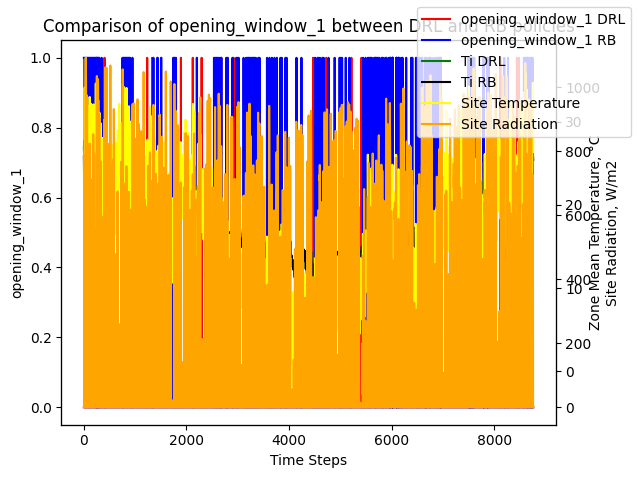

In [74]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned,
    rb_data_cleaned=rb_data_cleaned,
    column_name=column_name
    )

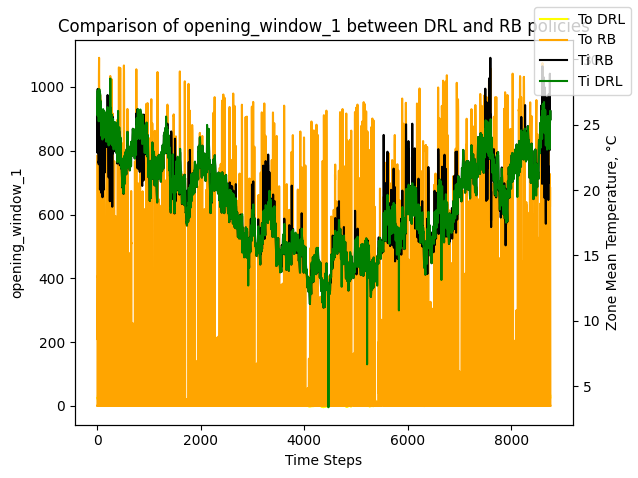

In [75]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Time Steps')
ax1.set_ylabel(column_name)
ax1.plot(drl_data_cleaned['To'], label='To DRL', color='yellow')
ax1.plot(rb_data_cleaned['rad'], label='To RB', color='orange')

ax2 = ax1.twinx()
ax2.set_ylabel('Zone Mean Temperature, °C')
ax2.plot(rb_data_cleaned['Ti'], label='Ti RB', color='black')
ax2.plot(drl_data_cleaned['Ti'], label='Ti DRL', color='green')


plt.title(f'Comparison of {column_name} between DRL and RB policies')
fig.legend()
fig.tight_layout() 

# Display the plot
plt.show()

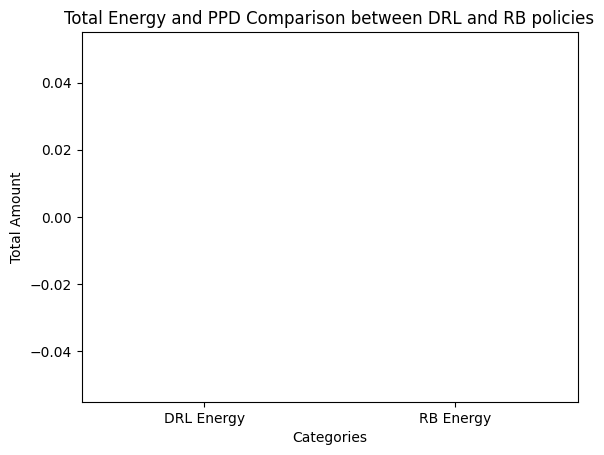

In [76]:
# Define the columns representing 'energy' and 'comfort'
energy_column = 'energy'

# Calculate total energy and comfort for each DataFrame
drl_total_energy = drl_data_cleaned[energy_column].sum()

rb_total_energy = rb_data_cleaned[energy_column].sum()

# Create a bar graph
categories = ['DRL Energy', 'RB Energy']
values = [drl_total_energy, rb_total_energy]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [ ]:
# Define the columns representing 'energy' and 'comfort'
ppd_column = 'ppd'

# Calculate total energy and comfort for each DataFrame
drl_total_ppd = drl_data_cleaned[ppd_column].mean()/100

rb_total_ppd = rb_data_cleaned[ppd_column].mean()/100

# Create a bar graph
categories = ['DRL PPD', 'RB PPD']
values = [drl_total_ppd, rb_total_ppd]

plt.bar(categories, values, color=['blue', 'red'])
plt.xlabel('Categories')
plt.ylabel('Total Amount')
plt.title('Total Energy and PPD Comparison between DRL and RB policies')
plt.show()

In [78]:
drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy
#drl_comfort_rate_increment = (drl_total_ppd-rb_total_ppd)/rb_total_ppd

print('The Energy Rate Increment of DRL Policy is: ' + str(round(drl_energy_rate_increment*100, 2))+'%\n')
#print('The PPD Rate Increment of DRL Policy is: ' + str(round(drl_comfort_rate_increment*100, 2))+'%')

The Energy Rate Increment of DRL Policy is: nan%



C:\Users\grhen\AppData\Local\Temp\ipykernel_12172\485704745.py:1: RuntimeWarning: invalid value encountered in scalar divide
  drl_energy_rate_increment = (drl_total_energy-rb_total_energy)/rb_total_energy


## Análisis de políticas

En este apartado analizaremos las políticas seguidas por el agente DRL y las compararemos con las del RB.
Para ello, caracterizaremos algunas métricas generales que contemplen el año entero y luego nos enfocaremos en el estudio de algunas semanas características para observar el comportamiento de cada política.

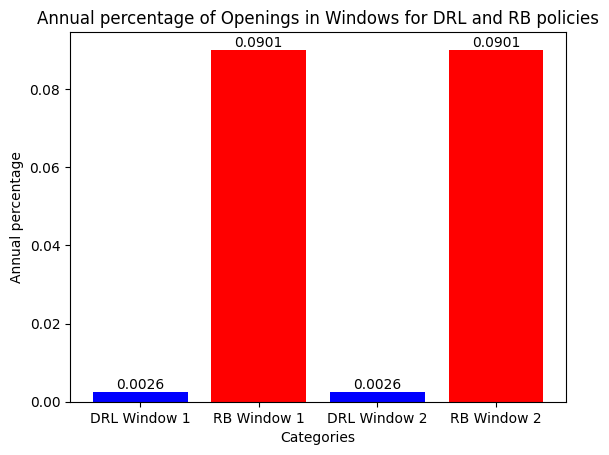

In [79]:
# Define the columns representing 'energy' and 'comfort'
metrics = [
    round(drl_data_cleaned.describe()['opening_window_1']['mean'],4),
    round(drl_data_cleaned.describe()['opening_window_2']['mean'],4),
    round(rb_data_cleaned.describe()['opening_window_1']['mean'],4),
    round(rb_data_cleaned.describe()['opening_window_2']['mean'],4)
]

# Create a bar graph
categories = ['DRL Window 1', 'RB Window 1', 'DRL Window 2', 'RB Window 2']
values = [metrics[0], metrics[2], metrics[1], metrics[3]]

plt.bar_label(plt.bar(categories, values, color=['blue', 'red', 'blue', 'red']))
plt.xlabel('Categories')
plt.ylabel('Annual percentage')
plt.title('Annual percentage of Openings in Windows for DRL and RB policies')
plt.show()

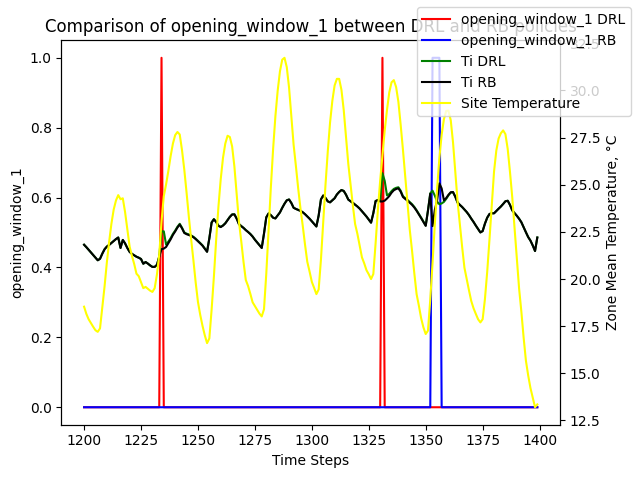

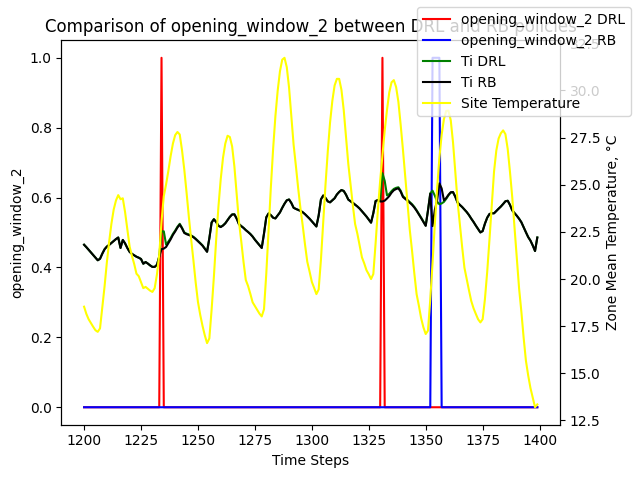

In [86]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[1200:1400],
    rb_data_cleaned=rb_data_cleaned.iloc[1200:1400],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'opening_window_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[1200:1400],
    rb_data_cleaned=rb_data_cleaned.iloc[1200:1400],
    column_name=column_name
    )

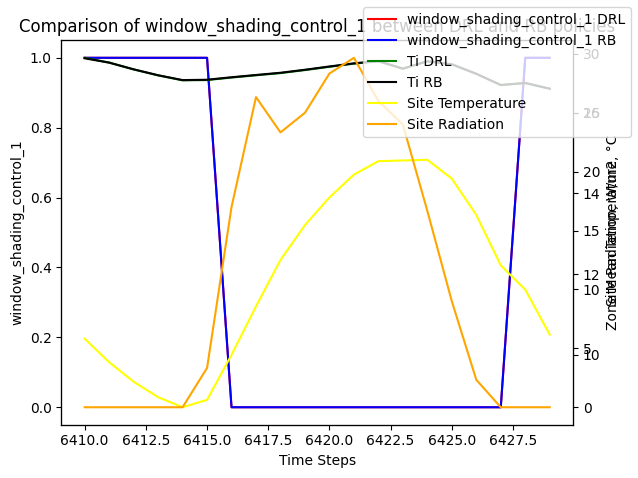

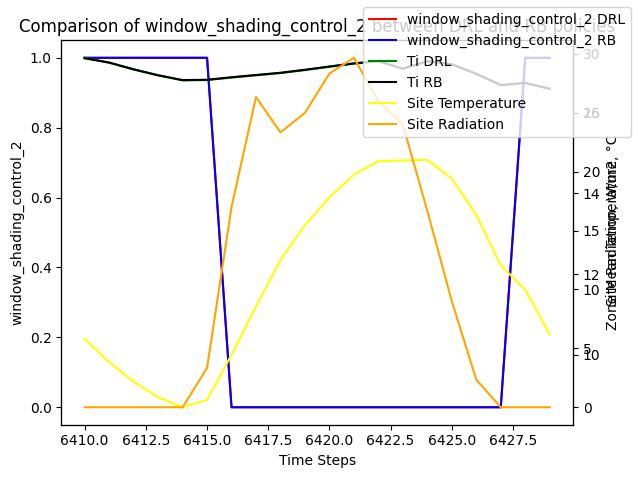

In [81]:
# Replace 'column_name' with the name of the column you want to plot
column_name = 'window_shading_control_1'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[6410:6430],
    rb_data_cleaned=rb_data_cleaned.iloc[6410:6430],
    column_name=column_name
    )

# Replace 'column_name' with the name of the column you want to plot
column_name = 'window_shading_control_2'

line_plot(
    drl_data_cleaned=drl_data_cleaned.iloc[6410:6430],
    rb_data_cleaned=rb_data_cleaned.iloc[6410:6430],
    column_name=column_name
    )